In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import Compose


from data.ImageDataset import ImageDataset,convert_tensor_to_numpy
from utils.augmentation import VerticalFlip, Rotate,ZoomIn, ZoomOut, ColRec, GaussianNoise,GaussianBlur
from serde import read_config,Experiment
from utils.visualization import display_input


In [3]:
# Helper function that creates dataloader for testing various augmentation operations

def create_aug_test_dataloader(exp,augmentation_operation):
    
    dataset =ImageDataset(dataset_name='SimSet1',
                          size=1,
                          cfg_path=exp.params['cfg_path'],
                          augmentation=augmentation_operation)
    
    loader = torch.utils.data.DataLoader(dataset=dataset,batch_size=1,shuffle=False)
    
    return loader

In [4]:
# Helper function for displaying first image in each minibatch

def display_img(loader):
    for i, (images, labels) in enumerate(loader):
    
        # Select first image from minibatch
        image = images[0]
        label = labels[0]

        # Convert to numpy
        image = convert_tensor_to_numpy(image)
        label = convert_tensor_to_numpy(label)

        # Plot the arrays
        display_input(image,label)
    

In [5]:
# Creating an experiment to test the augmentation implementation.
exp = Experiment(name='TestExp', new=True, overwrite=True)

### No Augmentation Applied



<center>**Reference Image**</center>
![alt text](./tests/noaug.png "Reference")

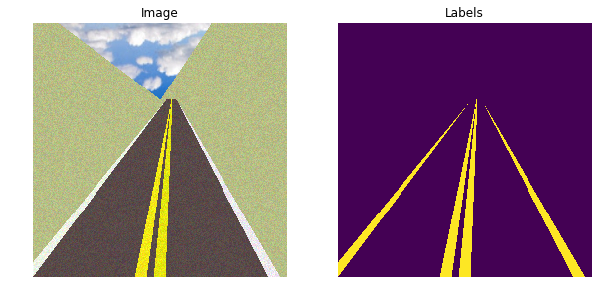

In [6]:
augmentation_operation=None

loader = create_aug_test_dataloader(exp,augmentation_operation)

display_img(loader)

---

### Augmentation Applied: VerticalFlip




<center>**Reference Image**</center>
![alt text](./tests/vflip.png "Reference")

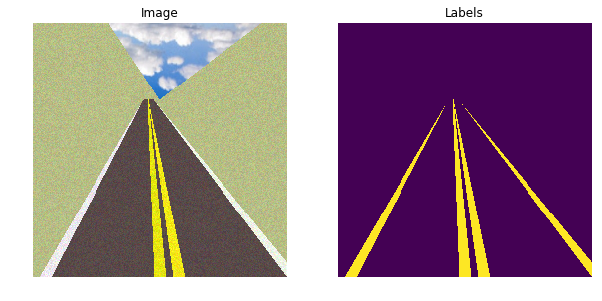

In [7]:
augmentation_operation=VerticalFlip(probability=1)

loader = create_aug_test_dataloader(exp,augmentation_operation)

display_img(loader)

---

### Augmentation Applied:Gaussian Blur





<center>**Reference Image**</center>
![alt text](./tests/blur.png "Reference")

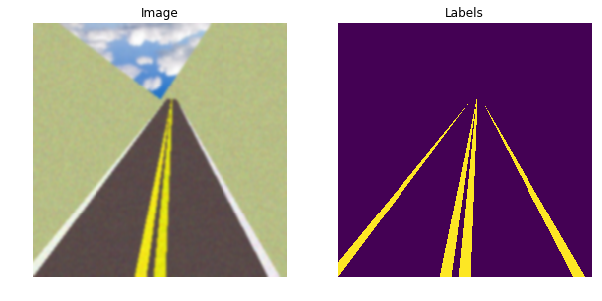

In [8]:
augmentation_operation=GaussianBlur(probability=1)

loader = create_aug_test_dataloader(exp,augmentation_operation)

display_img(loader)

---

### Augmentation Applied: Rotate



<center>**Reference Image**</center>
![alt text](./tests/rot.png "Reference")

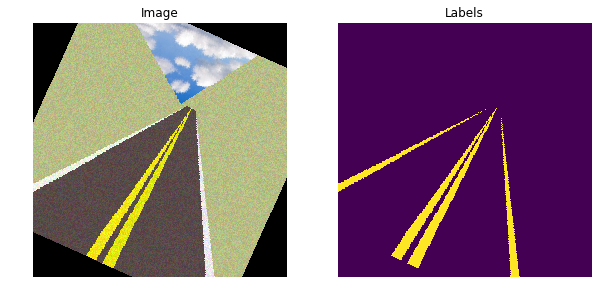

In [9]:
augmentation_operation=Rotate(probability=1)

loader = create_aug_test_dataloader(exp,augmentation_operation)

display_img(loader)

---

### Augmentation Applied: VerticalFlip; Rotate
 Using the `torchvision.transforms.Compose` to combine multiple augmentations.
 
 
 


<center>**Reference Image**</center>
![alt text](./tests/rot_flip.png "Reference")

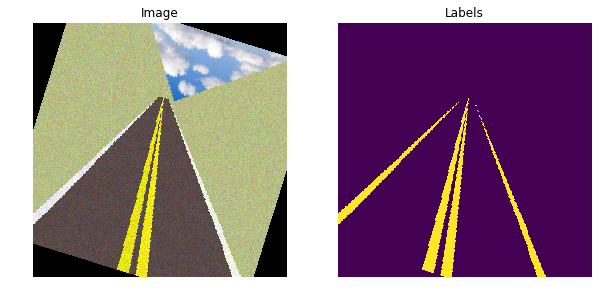

In [10]:
augmentation_operation=Compose([VerticalFlip(probability=1),Rotate(probability=1)])

loader = create_aug_test_dataloader(exp,augmentation_operation)

display_img(loader)

---

### Augmentation Applied:ZoomIn





<center>**Reference Image**</center>
![alt text](./tests/zoomin.png "Reference")

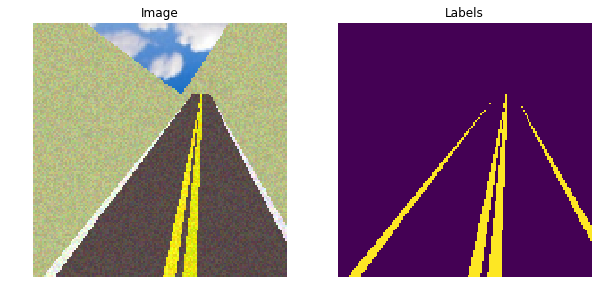

In [11]:
augmentation_operation=ZoomIn(probability=1)

loader = create_aug_test_dataloader(exp,augmentation_operation)

display_img(loader)

---

### Augmentation Applied:ZoomOut





<center>**Reference Image**</center>
![alt text](./tests/zoomout.png "Reference")

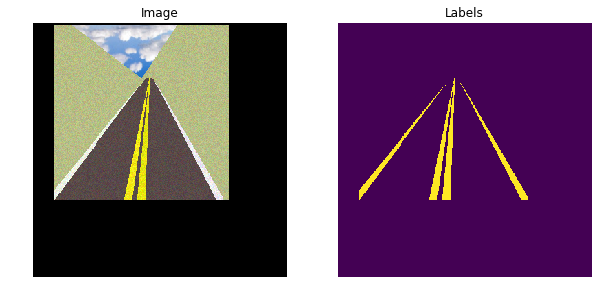

In [12]:
augmentation_operation=ZoomOut(probability=1)

loader = create_aug_test_dataloader(exp,augmentation_operation)

display_img(loader)

---

### Augmentation Applied:ColRec





<center>**Reference Image**</center>
![alt text](./tests/colrec.png "Reference")

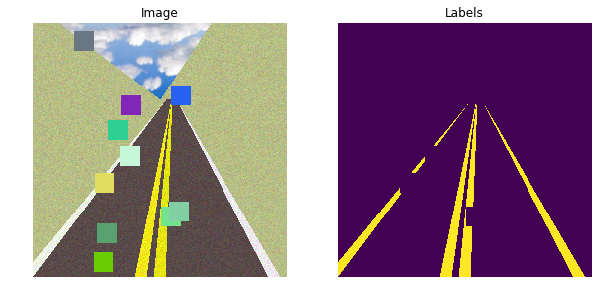

In [13]:
augmentation_operation=ColRec(probability=1)

loader = create_aug_test_dataloader(exp,augmentation_operation)

display_img(loader)

---

### Augmentation Applied:Gaussian Noise





<center>**Reference Image**</center>
![alt text](./tests/gaussian.png "Reference")

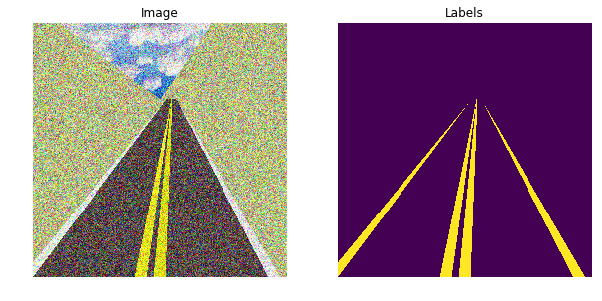

In [14]:
augmentation_operation=GaussianNoise(probability=1)

loader = create_aug_test_dataloader(exp,augmentation_operation)

display_img(loader)